In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

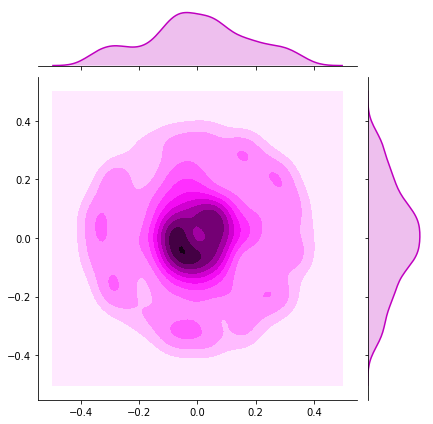

In [3]:
plt.figure()

n = 1000
th = np.random.rand(n) * 2*np.pi
r = np.exp(-2*np.random.rand(n)**2-1)
x = r*np.cos(th)
y = r*np.sin(th)
g = sns.jointplot(x, y, kind='kde', color='m')
#g.plot_joint(plt.scatter, c='w', s=30, lw=1, marker='+')
#g.ax_joint.collections[0].set_alpha(0)
#plt.grid()

In [4]:
def convolve_periodic(A, k):
    n1, m1 = A.shape
    n2, m2 = k.shape
    lx = int((n2-1)/2)
    ly = int((m2-1)/2)
    B = np.zeros_like(A, dtype=float)
    for i1 in range(n1):
        for j1 in range(m1):
            #print("({},{})".format(i1, j1))
            for i2 in range(n2):
                for j2 in range(m2):
                    #print("[{},{}]: ".format(i2,j2), end='')
                    i = (i1 - lx + i2) % n1
                    j = (j1 - ly + j2) % m1
                    #print("{}, {} ~ ".format(i, j), end='')
                    #print('{} + {:.2f} * {} = {} + {:.2f} = {:.2f} = '.format(
                    #    B[i1,j1], 
                    #    k[i2, j2],  
                    #    A[i, j], 
                    #    B[i1,j1], 
                    #    k[i2, j2] * A[i, j], 
                    #    B[i1,j1] + k[i2, j2] * A[i, j]), 
                    #    end=''
                    #)
                    B[i1,j1] += k[i2, j2] * A[i, j]
                    #print('{:.2f}'.format(B[i1,j1]))
            #print()
    return B

In [147]:
def circle_mix(x, y, A, r_bar):
    """
    x, y = 1d arrays
    A = current image
    r_bar = mix radius
    """
    B = np.zeros_like(A)
    nx = len(x)
    ny = len(y)
    dx = (x[1] - x[0]) 
    dy = (y[1] - y[0])
    ylen = dy * ny
    xlen = dx * nx
    xx = x.reshape([nx, 1])
    yy = y.reshape([1, ny])
    all_i, all_j = np.meshgrid(np.arange(nx), np.arange(ny), indexing='ij')
    if (nx, ny) != A.shape:
        raise ValueError("Shape mismatch: ({}, {}) != {}".format(nx, ny, A.shape))
    
    @np.vectorize
    def chi(i, j, ip, jp):
        for im_i in [0, -1, 1]:
            for im_j in [0, -1, 1]:
                if np.sqrt((x[i] - x[ip]+xlen*im_i)**2 + (y[j]-y[jp]+xlen*im_j)**2) <= r_bar:
                    return True
        return False
    
    Pr = lambda r: 3/2*r_bar**(-3/2)*np.sqrt(r)
    Pt = lambda th: 1/(2*np.pi)
    r = np.sqrt(xx**2 + yy**2)
    th = np.arctan2(yy, xx)
    integrand = Pr(r)*Pt(th)/r * A * dx * dy
    chi_inds = chi(0, 0, all_i, all_j)
    for i in range(nx):
        for j in range(ny):
            B[i, j] = np.sum(integrand[np.roll(chi_inds, (i, j), (0, 1))])
    
    return B

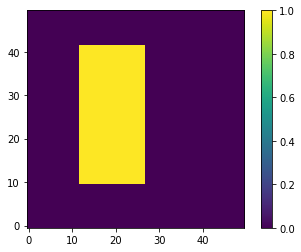

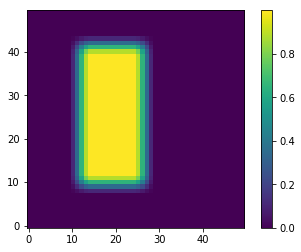

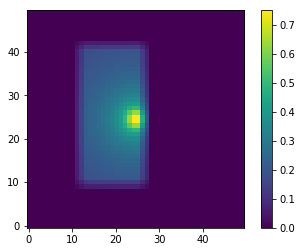

In [148]:
n = 50
X = np.linspace(-5, 5, n)
Y = np.linspace(-5, 5, n)
x, y = np.meshgrid(X, Y, indexing='ij')
z = 0 * (x + y)
z[12:27, 10:42] = 1
plt.figure()
plt.imshow(z.T, origin='lower')
plt.colorbar()

plt.figure()
nk = 5
r = 1
XX = np.linspace(-1, 1, nk)
YY = np.linspace(-1, 1, nk)
xx, yy = np.meshgrid(XX, YY, indexing='ij')
k = np.exp((-xx**2 - yy**2)/r**2)
k /= np.sum(k)
B = convolve_periodic(z, k)
plt.imshow(B.T, origin='lower')
plt.colorbar()
plt.show()

plt.figure()
r_bar = 0.4
B = circle_mix(X, Y, z, r_bar)
plt.imshow(B.T, origin='lower')
plt.colorbar()
plt.show()


In [127]:
np.nanmax(B)

1.0972605103164732

In [ ]:
k

In [ ]:
B